In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\rasha\OneDrive\Desktop\Job 2026\PowerBI\Diabetes 130 US hospitals\diabetic_data.csv')

In [3]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
df['max_glu_serum'] = df['max_glu_serum'].replace('None', 'Not tested').fillna('Not tested')
df['A1Cresult'] = df['A1Cresult'].replace('None', 'Not tested').fillna('Not tested')

In [5]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [6]:
df = df.replace('?', 'Not tested')

In [7]:
df['medical_specialty'] = df['medical_specialty'].replace('Not tested', "Not recorded")

In [8]:
for col in df.columns:
    vc = df[col].value_counts()
    print(f"Value counts for {col} is \n", vc)
    print('x'*100)

Value counts for encounter_id is 
 encounter_id
2278392      1
149190       1
64410        1
500364       1
16680        1
            ..
443847548    1
443847782    1
443854148    1
443857166    1
443867222    1
Name: count, Length: 101766, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts for patient_nbr is 
 patient_nbr
88785891     40
43140906     28
88227540     23
23199021     23
1660293      23
             ..
3327282       1
98427861      1
92519352      1
101002446     1
104672268     1
Name: count, Length: 71518, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts for race is 
 race
Caucasian          76099
AfricanAmerican    19210
Not tested          2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [9]:
# EDA

In [10]:
# Paient Demographics

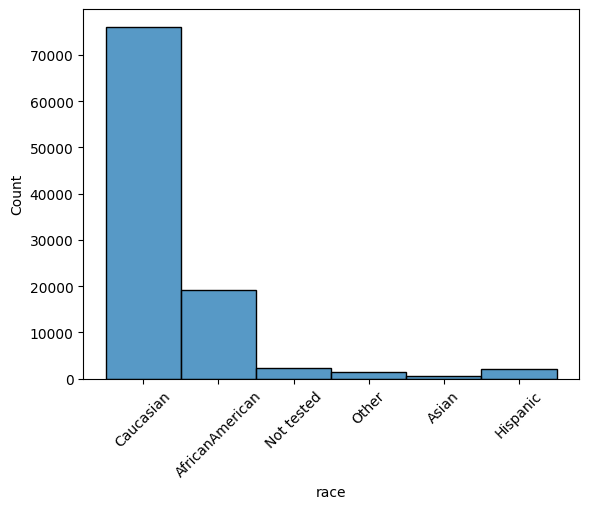

In [11]:
# Question 1- What is the distribution of race, gender, and age groups among admitted patients?

sns.histplot(df['race'])
plt.xticks(rotation = 45)
plt.show()

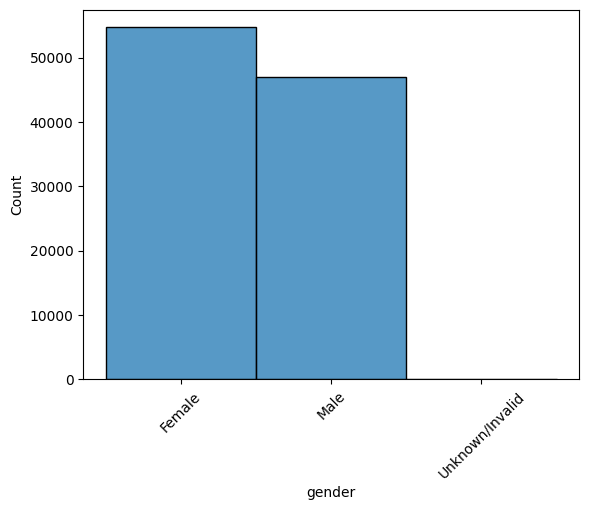

In [12]:
sns.histplot(df['gender'])
plt.xticks(rotation = 45)
plt.show()

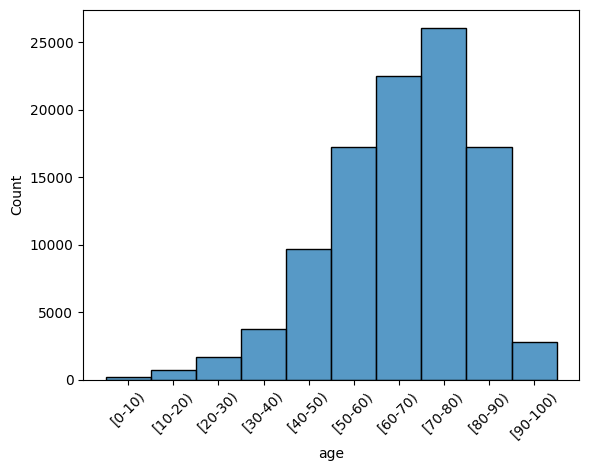

In [13]:
sns.histplot(df['age'])
plt.xticks(rotation = 45)
plt.show()

In [14]:
# Race is right skewed
# Gender shows uniform distribution
# age is close to normal distribution with bit left skew

In [15]:
# Question 2 - Are certain age groups more likely to be admitted?

In [16]:
df_readmission_filtered = df[df['readmitted']!='NO']

In [17]:
df_readmission_filtered.groupby('age')['readmitted'].count().sort_values(ascending = False)

age
[70-80)     12544
[60-70)     10399
[80-90)      8301
[50-60)      7585
[40-50)      4305
[30-40)      1611
[90-100)     1118
[20-30)       746
[10-20)       264
[0-10)         29
Name: readmitted, dtype: int64

In [18]:
# elderly people 50 onwards are more likely to get readmitted

In [19]:
# Question 3 - Which age + gender combinations dominate admissions?

In [20]:
df.groupby(['age', 'gender'])['encounter_id'].count().sort_values(ascending = False)

age       gender         
[70-80)   Female             13985
          Male               12081
[60-70)   Male               11421
          Female             11061
[80-90)   Female             10515
[50-60)   Male                8684
          Female              8572
[80-90)   Male                6682
[40-50)   Male                4874
          Female              4811
[30-40)   Female              2162
[90-100)  Female              2003
[30-40)   Male                1613
[20-30)   Female              1114
[90-100)  Male                 790
[20-30)   Male                 543
[10-20)   Female               402
          Male                 289
[0-10)    Female                83
          Male                  78
[70-80)   Unknown/Invalid        2
[60-70)   Unknown/Invalid        1
Name: encounter_id, dtype: int64

In [21]:
''' age       gender         
[70-80)   Female             13985
          Male               12081
[60-70)   Male               11421
          Female             11061
[80-90)   Female             10515
[50-60)   Male                8684
          Female              8572'''

' age       gender         \n[70-80)   Female             13985\n          Male               12081\n[60-70)   Male               11421\n          Female             11061\n[80-90)   Female             10515\n[50-60)   Male                8684\n          Female              8572'

In [22]:
# Question 4 - How many patients are repeat visitors (same patient_nbr multiple times)?

In [23]:
repeat_visitors = (df['patient_nbr'].value_counts() > 1).sum()
print(repeat_visitors)

16773


In [24]:
# Admission & Discharge

In [25]:
# Question 5 - What are the most common admission types (admission_type_id)?

In [26]:
df['admission_type_id'].value_counts().sort_values(ascending = False).head(5)

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
Name: count, dtype: int64

In [27]:
# Question 6 - Which discharge dispositions are most frequent? (e.g., discharged home vs transferred)

In [28]:
df['discharge_disposition_id'].value_counts().sort_values(ascending = False).head(5)

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
Name: count, dtype: int64

In [29]:
# Question 7 - What are the top admission sources (ER, referral, physician)?

In [30]:
df['admission_source_id'].value_counts().sort_values(ascending = False).head(5)

admission_source_id
7     57494
1     29565
17     6781
4      3187
6      2264
Name: count, dtype: int64

In [31]:
# Question 8 - How does time in hospital vary by admission type or discharge disposition?

In [32]:
admission_id_time_in_hospital = df.groupby('admission_type_id')['time_in_hospital'].sum().sort_values(ascending = False).to_frame()

In [33]:
admission_id_time_in_hospital.reset_index()

,admission_type_id,time_in_hospital
0,1,236383
1,2,85206
2,3,81523
3,6,24249
4,5,18887
5,8,980
6,7,102
7,4,32


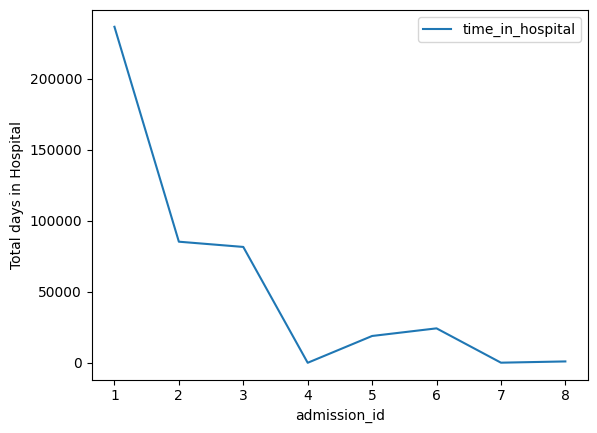

In [34]:
sns.lineplot(admission_id_time_in_hospital)
plt.xlabel('admission_id')
plt.ylabel('Total days in Hospital')
plt.show()

In [35]:
# Medical Specialties & Procedures

In [36]:
# Question 9 - What are the top medical specialties patients are admitted to?

In [37]:
df['medical_specialty'].value_counts().sort_values(ascending = False).head()

medical_specialty
Not recorded              49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
Name: count, dtype: int64

In [38]:
# InternalMedicine, Emergency/Trauma, Family/GeneralPractice, Cardiology are the most common medical_specialities pateints are admitted to

In [39]:
# Question 10 - Which specialties have the longest average hospital stay?

In [40]:
df.groupby('medical_specialty')['time_in_hospital'].mean().sort_values(ascending = False).head()

medical_specialty
Pediatrics-AllergyandImmunology      12.666667
Pediatrics-Pulmonology                9.720000
PhysicalMedicineandRehabilitation     8.872123
Psychiatry-Addictive                  8.000000
Pathology                             7.705882
Name: time_in_hospital, dtype: float64

In [41]:
# Pediatrics-AllergyandImmunology have the longest average hospital stay

In [42]:
# Question 11 - Which specialties have the highest readmission rates?

In [43]:
total_readmissions = len(df_readmission_filtered)

In [44]:
df_readmission_filtered.groupby(['medical_specialty'])['readmitted'].count().sort_values(ascending = False).head()

medical_specialty
Not recorded              23997
InternalMedicine           6369
Emergency/Trauma           3852
Family/GeneralPractice     3546
Cardiology                 2278
Name: readmitted, dtype: int64

In [45]:
# InternalMedicine have the highest readmission rates

In [46]:
# Question 12 - What’s the distribution of number of lab procedures, procedures, and medications across patients?

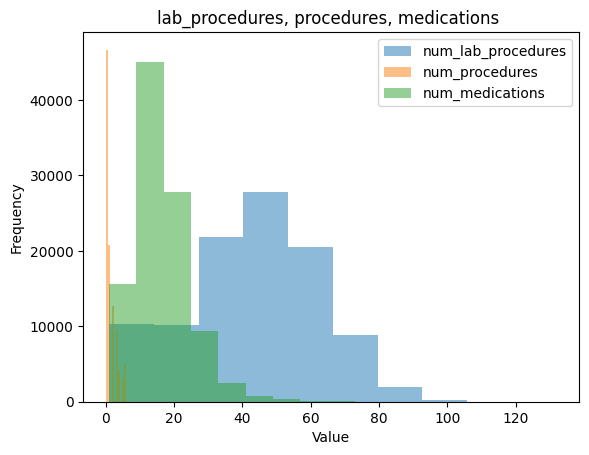

In [47]:
plt.hist(df['num_lab_procedures'], label = 'num_lab_procedures', alpha = 0.5)
plt.hist(df['num_procedures'], label = 'num_procedures', alpha = 0.5)
plt.hist(df['num_medications'], label = 'num_medications', alpha = 0.5)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("lab_procedures, procedures, medications ")
plt.legend()

# Show plot
plt.show()

In [48]:
# Insights  - 

In [49]:
# Question 13 -  patients with more medications tend to have longer stays?

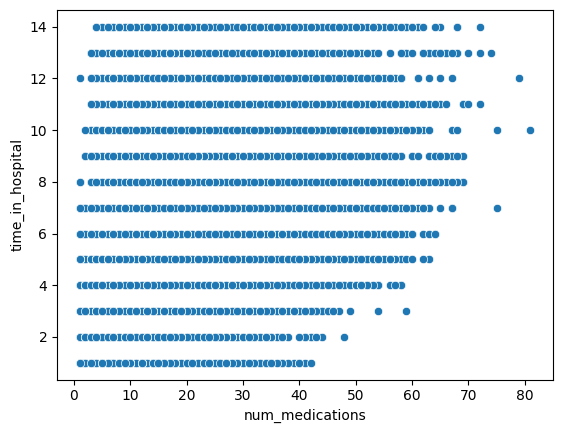

In [50]:
sns.scatterplot(data = df, x = 'num_medications', y = 'time_in_hospital')
plt.show()

In [51]:
# Insights - 
# Some patients received a very high number of medications (60–80), but those cases are rare (few dots on the far right).
# There isn’t a clear linear relationship (e.g., more days doesn’t always mean more medications). The distribution looks scattered.

In [52]:
# Diagnoses & Conditions

In [53]:
# Question 14 - What are the most common primary diagnoses (diag_1)?

In [54]:
df['diag_1'].value_counts().sort_values(ascending = False).head()

diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
Name: count, dtype: int64

In [55]:
# Insights - find what these number mean

In [56]:
# Question 15 - How many patients have multiple diagnoses (number_diagnoses)?

In [57]:
df_mult_diagnosis_filtered = df[df['number_diagnoses']>1]

In [58]:
df_mult_diagnosis_filtered['patient_nbr'].nunique()

71340

In [59]:
# Question 16 - Which diagnosis categories (e.g., diabetes, heart disease, infections) are linked with higher readmissions?

In [60]:
df_readmission_filtered.groupby('diag_1')['readmitted'].count().sort_values(ascending = False).head()

diag_1
428    4057
414    2720
786    1709
486    1683
410    1438
Name: readmitted, dtype: int64

In [61]:
# Question 17 - Is there a difference in LOS (time_in_hospital) across diagnosis categories?

In [62]:
df.groupby('diag_1')['time_in_hospital'].mean().sort_values(ascending = False).head()

diag_1
145    13.0
10     12.0
48     11.5
114    11.0
731    10.5
Name: time_in_hospital, dtype: float64

In [63]:
# Lab Results

In [64]:
# Question 18 - How many patients had glucose serum tests and what were the results?

In [65]:
df['max_glu_serum'].value_counts()

max_glu_serum
Not tested    96420
Norm           2597
>200           1485
>300           1264
Name: count, dtype: int64

In [66]:
# Question 19 - How many patients had A1C tests and what were the results?

In [67]:
df['A1Cresult'].value_counts()

A1Cresult
Not tested    84748
>8             8216
Norm           4990
>7             3812
Name: count, dtype: int64

In [68]:
# Question 20 - Are patients with abnormal A1C results more likely to be readmitted?

In [69]:
abnormal = df.query("A1Cresult == '>8' or A1Cresult == '>7'")
normal  = df.query("A1Cresult == 'Norm'")

In [70]:
abnormal_rate = (abnormal['readmitted'] != 'NO').mean()
normal_rate = (normal['readmitted'] != 'NO').mean()

print("Readmission rate (abnormal A1C):", abnormal_rate)
print("Readmission rate (normal A1C):", normal_rate)

Readmission rate (abnormal A1C): 0.4485367475889591
Readmission rate (normal A1C): 0.41703406813627253


In [71]:
# Patients with abnormal A1C results more likely to be readmitted

In [72]:
# Medications

In [73]:
# Question 21 - What are the most commonly prescribed diabetes medications?

In [74]:
diabetes_filtered = df[df['diabetesMed'] == 'Yes']

In [75]:
drug_col = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin'
]

In [76]:
drug_counts = diabetes_filtered[drug_col].apply(lambda x: (x != 'No').sum()).sort_values(ascending=False)

In [77]:
drug_counts

insulin                54383
metformin              19988
glipizide              12686
glyburide              10650
pioglitazone            7328
rosiglitazone           6365
glimepiride             5191
repaglinide             1539
glyburide-metformin      706
nateglinide              703
acarbose                 308
chlorpropamide            86
tolazamide                39
miglitol                  38
tolbutamide               23
glipizide-metformin       13
troglitazone               3
acetohexamide              1
examide                    0
citoglipton                0
dtype: int64

In [78]:
#Insulin, Metformin, glipizide, glyburide are the most prescribed drugs

In [79]:
# Question 22 - How often do medication regimens change during hospitalization?

In [80]:
medication_change = len(df[df['change'] =='Ch'])/len(df)
medication_change

0.46195192893500775

In [81]:
# 46 % times medications change during hospitalization

In [82]:
# Question 23 - Is there a difference in readmission rates by insulin use (Yes/No)?

<Axes: xlabel='insulin'>

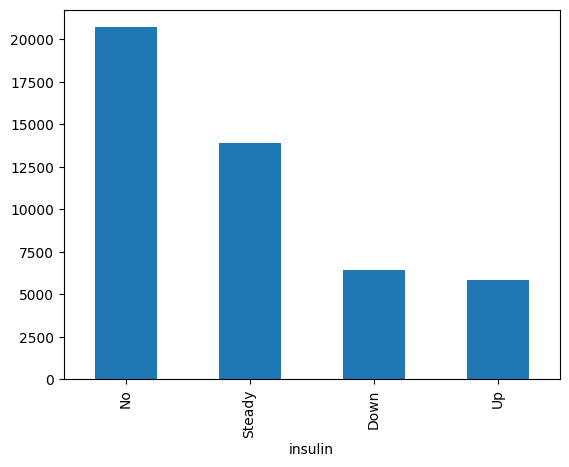

In [83]:
df_readmission_filtered['insulin'].value_counts().plot(kind = 'bar')

In [84]:
# for people who are not taking any insulin, the readmissions are more for such people as compared to who are taking Insulin

In [85]:
# Question 24 - Do patients on combination therapies (e.g., metformin+rosiglitazone) differ in outcomes?

In [86]:
cols = [ 'glyburide-metformin',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone']

In [87]:
# patients on Combination therapy

In [88]:
combo_users= (df_readmission_filtered[cols] != 'No').any(axis = 1)
num_combo_patients = combo_users.sum()
print("Number of patients on any combination therapy:", num_combo_patients)

Number of patients on any combination therapy: 344


In [89]:
# patients not on combination therapy

In [90]:
no_combo_users= (df_readmission_filtered[cols] == 'No').all(axis = 1)
no_combo_patients = combo_users.sum()
print("Number of patients not on any combination therapy:", no_combo_patients)

Number of patients not on any combination therapy: 344


In [91]:
number_of_patients_readmitted = len(df_readmission_filtered)
number_of_patients_readmitted

46902

In [92]:
no_combination_readmission_ratio = no_combo_patients/number_of_patients_readmitted
print(" Ratio of people not taking any combination therapy who were readmitted",  no_combination_readmission_ratio)

 Ratio of people not taking any combination therapy who were readmitted 0.007334442028058505


In [93]:
combination_readmission_ratio = num_combo_patients/number_of_patients_readmitted
print(" Ratio of people taking any of the combination therapy who were readmitted",  combination_readmission_ratio)

 Ratio of people taking any of the combination therapy who were readmitted 0.007334442028058505


In [94]:
# Insights  - only 0.7% people who were on nay kind of combination drugs were readmitted

In [95]:
# Readmission Analysis (Main KPI)

In [96]:
# Question 25 - What is the overall readmission rate?

In [97]:
overall_readmission_rate = len(df_readmission_filtered)/len(df)
print('Overall readmission rate is ', overall_readmission_rate)

Overall readmission rate is  0.4608808442898414


<Axes: xlabel='age'>

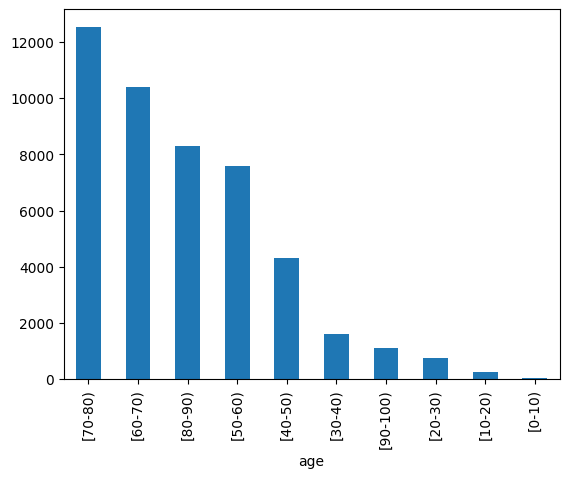

In [98]:
df_readmission_filtered['age'].value_counts().plot(kind = 'bar')

<Axes: xlabel='gender'>

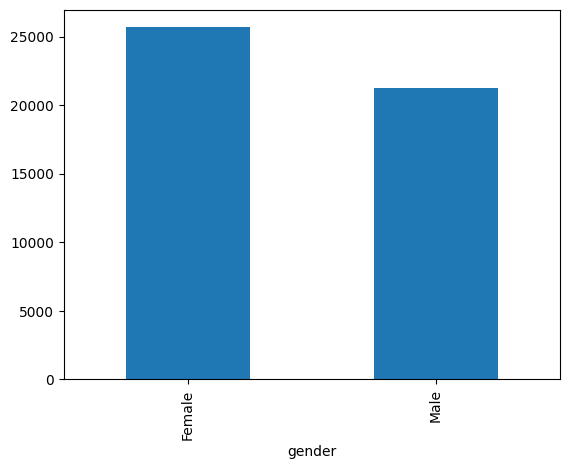

In [99]:
df_readmission_filtered['gender'].value_counts().plot(kind = 'bar')

<Axes: xlabel='race'>

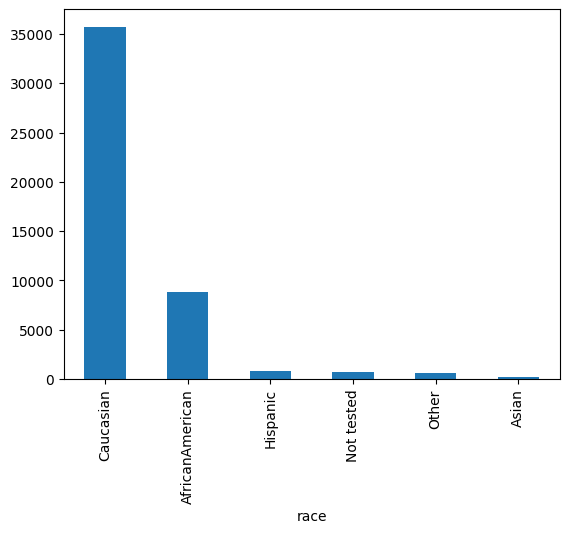

In [100]:
df_readmission_filtered['race'].value_counts().plot(kind = 'bar')

<Axes: xlabel='admission_type_id'>

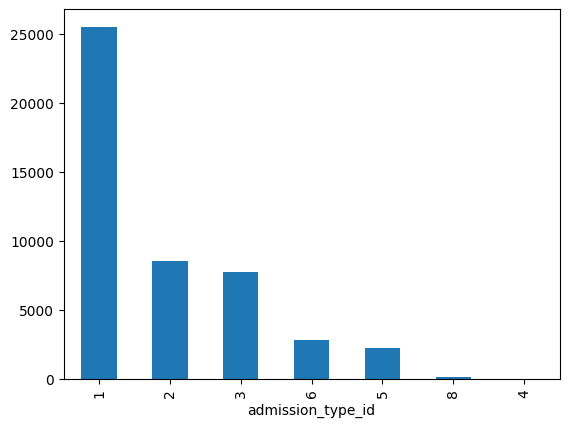

In [101]:
df_readmission_filtered['admission_type_id'].value_counts().plot(kind = 'bar')

<Axes: xlabel='medical_specialty'>

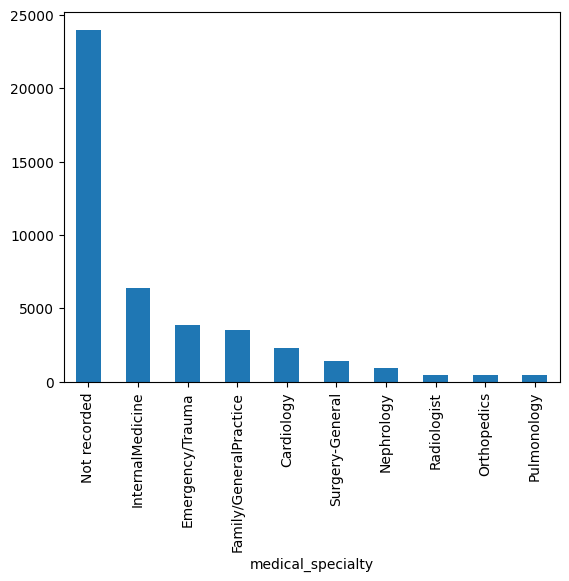

In [102]:
df_readmission_filtered['medical_specialty'].value_counts().head(10).plot(kind = 'bar')

<Axes: xlabel='diag_1'>

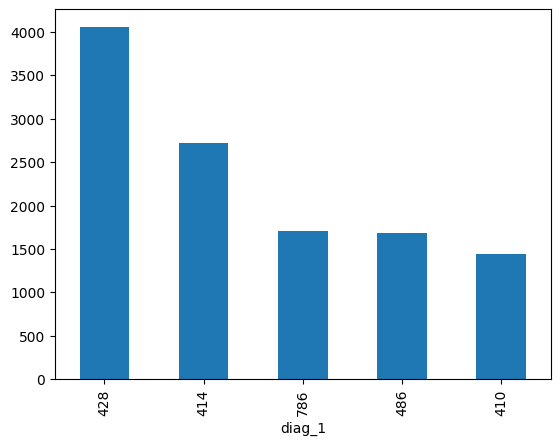

In [103]:
df_readmission_filtered['diag_1'].value_counts().head().plot(kind = 'bar')

<Axes: xlabel='A1Cresult'>

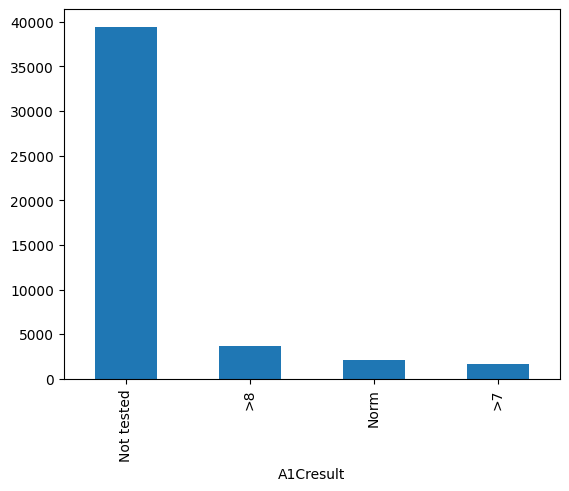

In [104]:
df_readmission_filtered['A1Cresult'].value_counts().plot(kind = 'bar')

In [105]:
# Question 26 - Do longer hospital stays reduce or increase readmission?

In [106]:
df_readmission_filtered.groupby('readmitted')['time_in_hospital'].mean()

readmitted
<30    4.768249
>30    4.495541
Name: time_in_hospital, dtype: float64

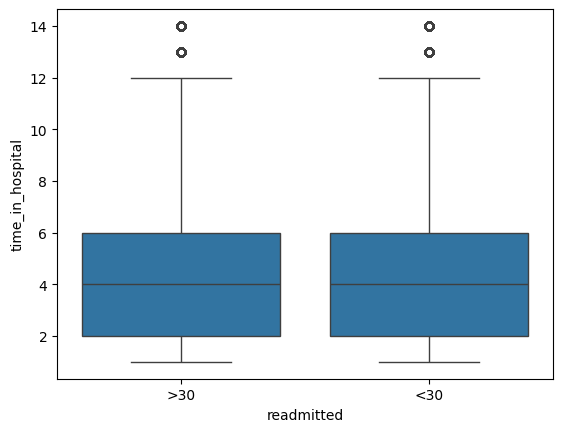

In [107]:
sns.boxplot(x='readmitted', y='time_in_hospital', data=df_readmission_filtered)
plt.show()

In [ ]:
# people who are readmitted with in 30 days have slighlty less average time in hospital 
# as compared to those admitted after 30 days

In [ ]:
# Operational Insights

In [ ]:
# Question 28 - What is the average length of stay (LOS) across the dataset?

In [112]:
avg_length_stay = df['time_in_hospital'].mean().round(2)
print(avg_length_stay, 'Days')

4.4 Days


In [ ]:
# Question 30 - Which payer codes (insurance types) dominate, and do they impact LOS/readmission?

In [115]:
df.groupby('payer_code')['time_in_hospital'].mean().sort_values(ascending = False)

payer_code
FR            10.000000
MP             6.734177
Not tested     4.591663
MC             4.484386
MD             4.362118
CM             4.349510
OT             4.178947
DM             4.178506
UN             4.100082
SP             4.045137
HM             4.017851
CP             3.881169
PO             3.854730
OG             3.853824
WC             3.792593
BC             3.687218
SI             3.654545
CH             3.534247
Name: time_in_hospital, dtype: float64

In [ ]:
# Payer_code FR has largest average time_in_hospital

In [ ]:
# Question 31 - Bed utilization proxy: Which specialties contribute the most hospital days?

In [119]:
df.groupby('medical_specialty')['time_in_hospital'].mean().head(10).sort_values(ascending = False)

medical_specialty
DCPTEAM                     6.166667
Emergency/Trauma            4.359683
Endocrinology               4.275000
Dentistry                   4.250000
AllergyandImmunology        3.857143
Cardiology                  3.525598
Anesthesiology              2.916667
Cardiology-Pediatric        2.857143
Anesthesiology-Pediatric    2.526316
Dermatology                 2.000000
Name: time_in_hospital, dtype: float64

In [ ]:
#-------------------------------------------THE END------------------------------